# Logistic Regression

In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Binary Classification

In [7]:

# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Setosa와 Versicolour, 처음 두 feature만 사용
y = iris.target[:100]

# Train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:

# 로지스틱 회귀 모델 학습 (C값 조절 가능)
clf = LogisticRegression(C=1.0, random_state=42)
clf.fit(X_train, y_train)

# Test set에 대한 Accuracy 계산
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")


Test Accuracy: 1.0000


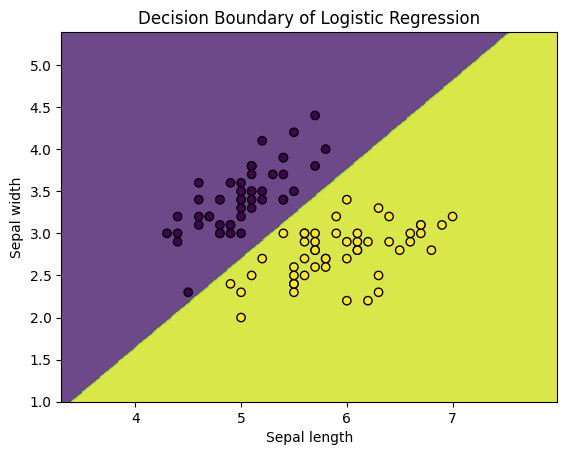

In [9]:

# Decision boundary 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of Logistic Regression')
plt.show()


In [10]:

# 로지스틱 회귀의 계수 출력
print("Intercepts:")
print(clf.intercept_)

print("\nCoefficients:")
print(clf.coef_)

Intercepts:
[-7.07994242]

Coefficients:
[[ 2.88868978 -2.72919824]]


## Multiclass Classification

Test Accuracy: 0.9000


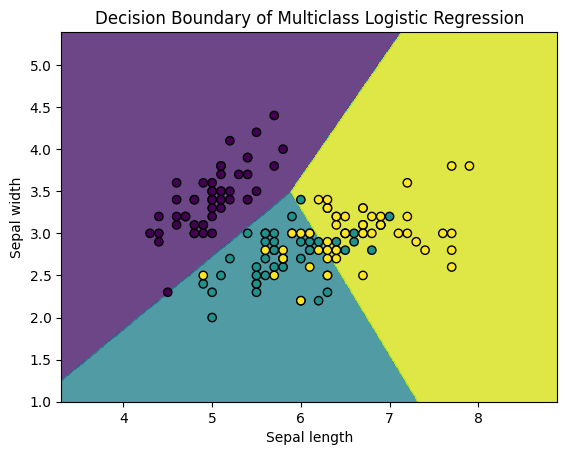

In [11]:

# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 feature만 사용
y = iris.target

# Train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중 클래스 로지스틱 회귀 모델 학습 (C값 조절 가능)
clf = LogisticRegression(C=1.0, multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)

# Test set에 대한 Accuracy 계산
print(f"Test Accuracy: {clf.score(X_test, y_test):.4f}")

# Decision boundary 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of Multiclass Logistic Regression')
plt.show()

In [12]:

# 로지스틱 회귀의 계수 출력
print("Intercepts:")
print(clf.intercept_)

print("\nCoefficients:")
print(clf.coef_)

Intercepts:
[ 7.18105479  1.37277873 -8.55383352]

Coefficients:
[[-2.50280394  2.16157087]
 [ 0.62272951 -1.44206518]
 [ 1.88007444 -0.71950568]]


# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB


Test Accuracy: 0.9000


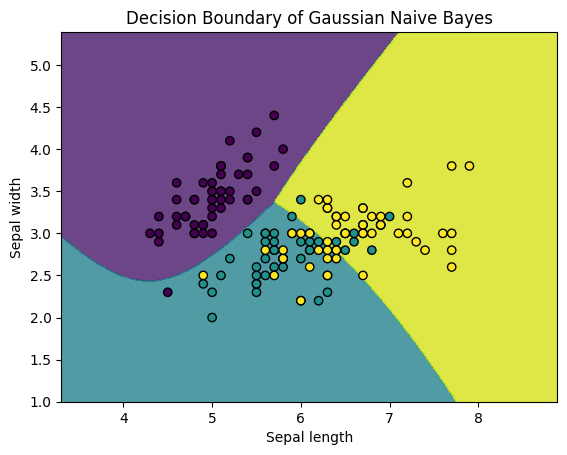

In [15]:
# Gaussian Naive Bayes 모델 학습
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test set에 대한 Accuracy 계산
print(f"Test Accuracy: {gnb.score(X_test, y_test):.4f}")

# Decision boundary 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary of Gaussian Naive Bayes')
plt.show()

In [16]:
from sklearn import datasets
from sklearn.naive_bayes import MultinomialNB

Test Accuracy: 0.9111


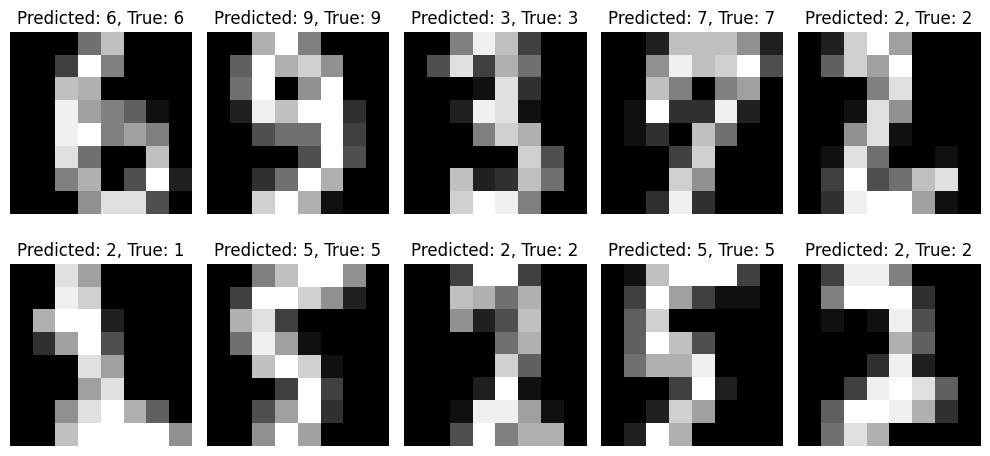

In [17]:

# 데이터 로드
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes 모델 학습
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Test set에 대한 Accuracy 계산
print(f"Test Accuracy: {mnb.score(X_test, y_test):.4f}")

# 예시 이미지와 예측값 시각화
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, lbl in zip(axes.ravel(), X_test, y_test):
    ax.imshow(img.reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Predicted: {mnb.predict([img])[0]}, True: {lbl}")

plt.tight_layout()
plt.show()

# k-NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier


In [25]:

# 데이터 로드
iris = datasets.load_iris()
X = iris.data[:, 2:]  # 처음 두 feature만 사용
y = iris.target

# Train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9, 11]  # 다양한 k 값을 사용하여 실험


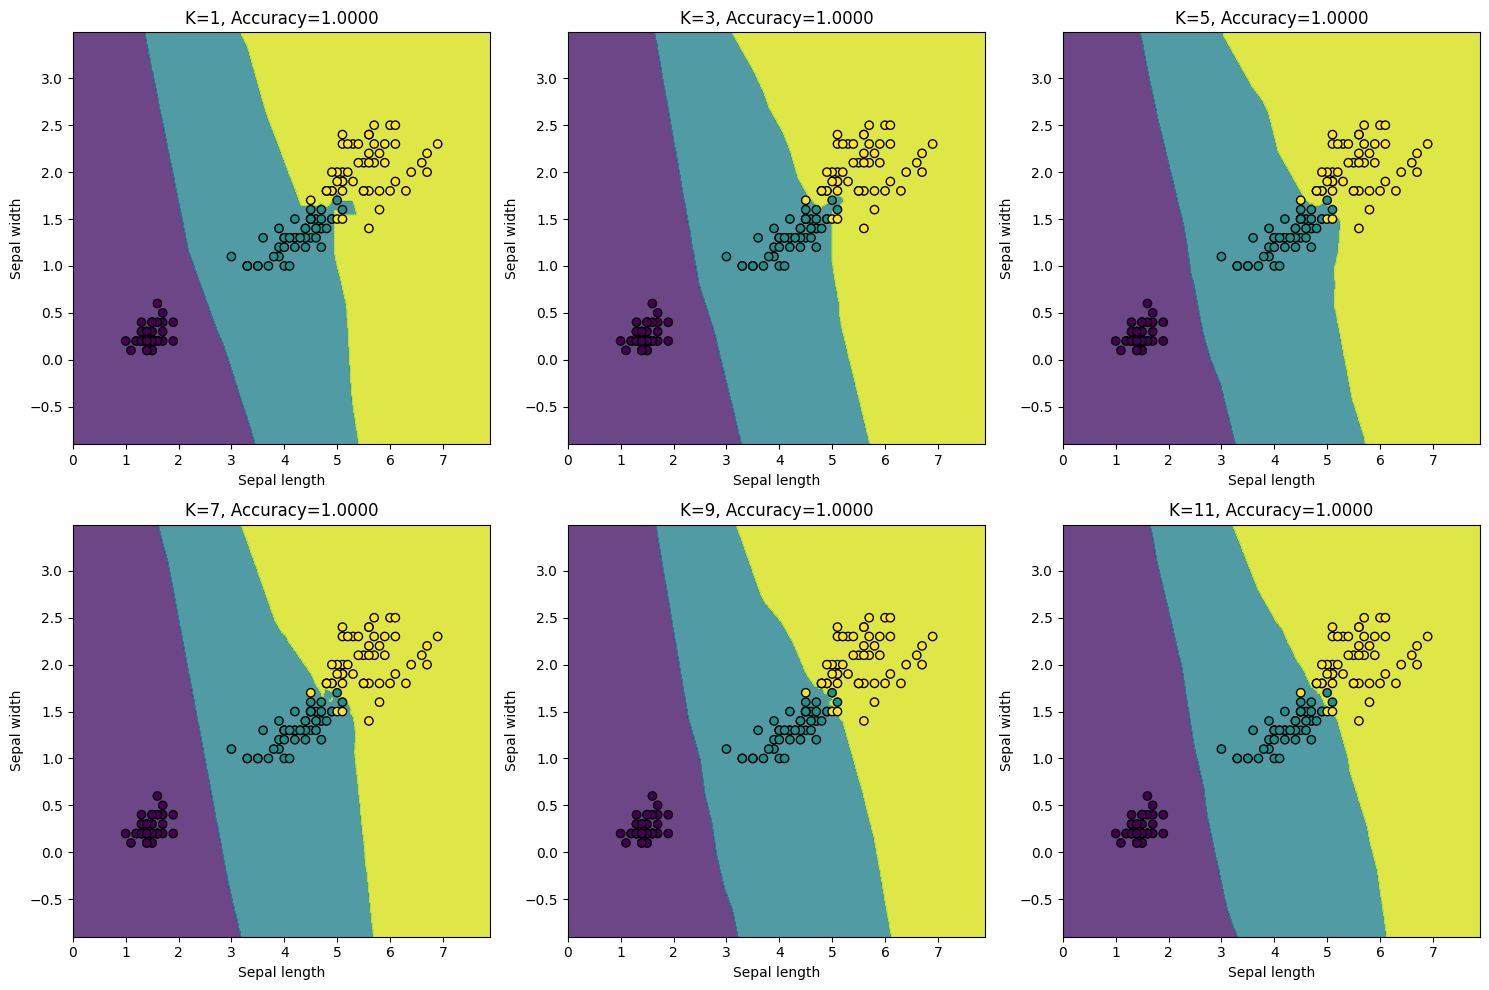

In [26]:

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values, 1):
    # KNN 모델 학습
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Test set에 대한 Accuracy 계산
    accuracy = knn.score(X_test, y_test)
    
    # Decision boundary 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(f"K={k}, Accuracy={accuracy:.4f}")

plt.tight_layout()
plt.show()